# Decision Tree

## Exercises pt I

Using the titanic data, in your classification-exercises repository, create a notebook, model.ipynb where you will do the following:

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   passenger_id  891 non-null    int64  
 1   survived      891 non-null    int64  
 2   pclass        891 non-null    int64  
 3   sex           891 non-null    object 
 4   age           714 non-null    float64
 5   sibsp         891 non-null    int64  
 6   parch         891 non-null    int64  
 7   fare          891 non-null    float64
 8   embarked      889 non-null    object 
 9   class         891 non-null    object 
 10  deck          203 non-null    object 
 11  embark_town   889 non-null    object 
 12  alone         891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 97.5+ KB
Column: sex
male      577
female    314
Name: sex, dtype: int64
---------
male      0.647587
female    0.352413
Name: sex, dtype: float64
Column: embarked
S    644
C    168
Q     77
Name:

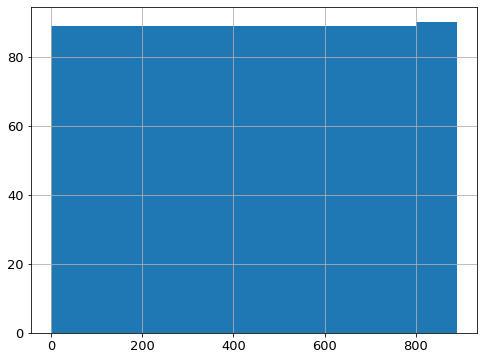

survived


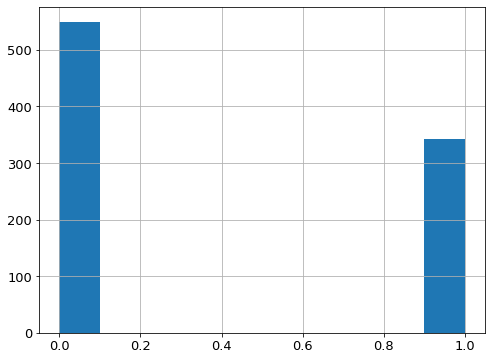

pclass


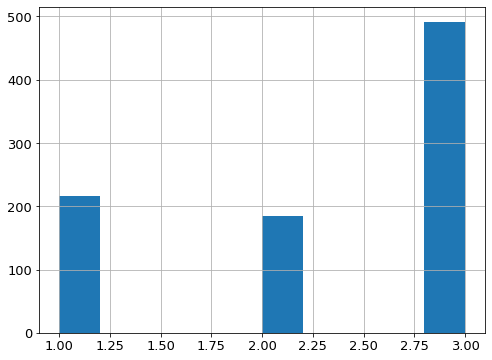

age


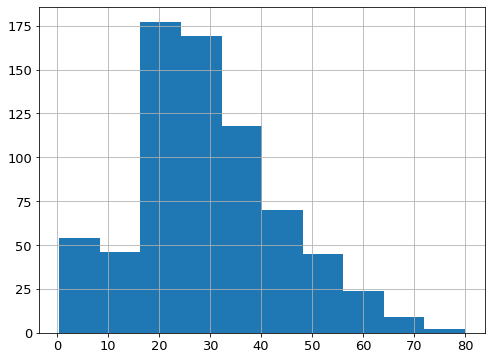

sibsp


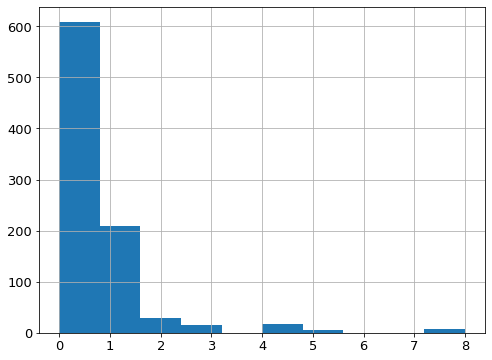

parch


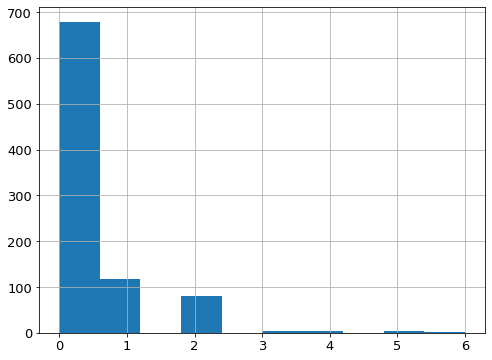

fare


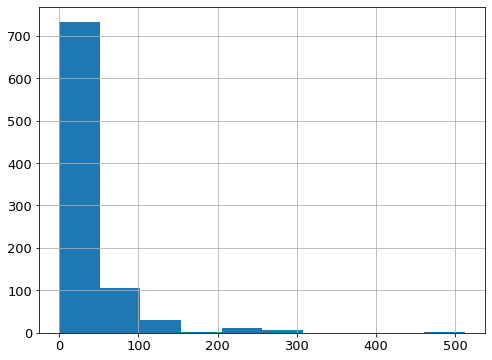

alone


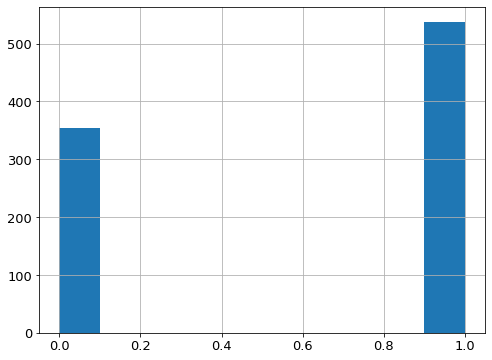

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   survived                 891 non-null    int64  
 1   pclass                   891 non-null    int64  
 2   age                      714 non-null    float64
 3   sibsp                    891 non-null    int64  
 4   parch                    891 non-null    int64  
 5   fare                     891 non-null    float64
 6   alone                    891 non-null    int64  
 7   sex_male                 891 non-null    uint8  
 8   embark_town_Queenstown   891 non-null    uint8  
 9   embark_town_Southampton  891 non-null    uint8  
dtypes: float64(2), int64(5), uint8(3)
memory usage: 58.3 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 498 entries, 301 to 3
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                

In [1]:
import pandas as pd
import numpy as np
import os

# visualize
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc('figure', figsize=(8, 6))
plt.rc('font', size=13)

# turn off pink warning boxes
import warnings
warnings.filterwarnings("ignore")

# acquire
from env import host, user, password

# To access pydataset data table use:
from pydataset import data

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.impute import SimpleImputer

from scipy import stats

import acquire
import prepare

In [2]:
titanic_df = acquire.get_titanic_data()
titanic_df.head(3)

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1


In [3]:
help(prepare)

Help on module prepare:

NAME
    prepare - # coding: utf-8

FUNCTIONS
    clean_iris(df)
        Prepares acquired Iris data for exploration
    
    clean_titanic(df)
        Takes in a titianic dataframe and returns a cleaned dataframe
        Arguments: df = a pandas dataframe with the expected feature names and columns
        Return: clean_df - a dataframe with the cleaning operations performed on it
    
    impute_age(train, validate, test)
        Imputes the mean age of train to all three datasets
    
    prep_iris(df)
        Prepares acquired Iris data for exploration
    
    prep_titanic(df)
        Prepares acquired Titanic data for exploration
    
    split_iris(df)
        take in a DataFrame and return train, validate, and test DataFrames; stratify on species.
        return train, validate, test DataFrames.

DATA
    catcols = ['sex', 'embarked', 'class', 'deck', 'embark_town']
    clean_df =      survived  pclass   age  sibsp  parch     fa...        ...
    col = 

In [4]:
train, validate, test = prepare.prep_titanic(titanic_df)
train.head(3)

,survived,pclass,age,sibsp,parch,fare,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
301,1,3,30.189296,2,0,23.2500,0,1,1,0
290,1,1,26.000000,0,0,78.8500,1,0,0,1
779,1,1,43.000000,0,1,211.3375,0,0,0,1


1. What is your baseline prediction? What is your baseline accuracy? remember: your baseline prediction for a classification problem is predicting the most prevelant class in the training dataset (the mode). When you make those predictions, what is your accuracy? This is your baseline accuracy.

In [5]:
# My baseline prediction is the mode that people on the titanic did not survive

In [6]:
help(DecisionTreeClassifier)

Help on class DecisionTreeClassifier in module sklearn.tree._classes:

class DecisionTreeClassifier(sklearn.base.ClassifierMixin, BaseDecisionTree)
 |  DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, class_weight=None, ccp_alpha=0.0)
 |  
 |  A decision tree classifier.
 |  
 |  Read more in the :ref:`User Guide <tree>`.
 |  
 |  Parameters
 |  ----------
 |  criterion : {"gini", "entropy"}, default="gini"
 |      The function to measure the quality of a split. Supported criteria are
 |      "gini" for the Gini impurity and "entropy" for the information gain.
 |  
 |  splitter : {"best", "random"}, default="best"
 |      The strategy used to choose the split at each node. Supported
 |      strategies are "best" to choose the best split and "random" to choose
 |      the best ran

In [7]:
train.survived.value_counts()

0    307
1    191
Name: survived, dtype: int64

2. Fit the decision tree classifier to your training sample and transform (i.e. make predictions on the training sample)

3. Evaluate your in-sample results using the model score, confusion matrix, and classification report.

In [8]:
pd.DataFrame(confusion_matrix(y_train,  y_predictions))
# Actual's on the left and Predictions are on top

NameError: name 'y_train' is not defined

In [ ]:
print(classification_report(y_train, y_predictions))

4. Compute: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

5. Run through steps 2-4 using a different `max_depth` value.

6. Which model performs better on your in-sample data?

7. Which model performs best on your out-of-sample data, the `validate` set?

## Exercises pt II

- Work through these same exercises using the Telco dataset.

1. What is your baseline prediction? What is your baseline accuracy? remember: your baseline prediction for a classification problem is predicting the most prevelant class in the training dataset (the mode). When you make those predictions, what is your accuracy? This is your baseline accuracy.

2. Fit the decision tree classifier to your training sample and transform (i.e. make predictions on the training sample)

3. Evaluate your in-sample results using the model score, confusion matrix, and classification report.

4. Compute: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

5. Run through steps 2-4 using a different `max_depth` value.

6. Which model performs better on your in-sample data?

7. Which model performs best on your out-of-sample data, the `validate` set?

- Experiment with this model on other datasets with a higher number of output classes. Like the iris data

# Random Forest
## Exercises
Continue working in your `model` file with titanic data to do the following:

In [196]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import acquire
import prepare

from pydataset import data

# read Iris data from pydatset
titanic_df = acquire.get_titanic_data()
titanic_df.head(3)

# convert column names to lowercase, replace '.' in column names with '_'
titanic_df.columns = [col.lower().replace('.', '_') for col in titanic_df]

titanic_df.head(3)

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1


1. Fit the Random Forest classifier to your training sample and transform (i.e. make predictions on the training sample) setting the random_state accordingly and setting min_samples_leaf = 1 and max_depth = 10.

In [197]:
train, validate, test = prepare.prep_titanic(titanic_df)
train.head(3)

,survived,pclass,age,sibsp,parch,fare,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
301,1,3,30.189296,2,0,23.2500,0,1,1,0
290,1,1,26.000000,0,0,78.8500,1,0,0,1
779,1,1,43.000000,0,1,211.3375,0,0,0,1


In [198]:
# create X & y version of train, where y is a series with just the target variable and X are all the features. 

X_train = train.drop(columns=['survived'])
y_train = train.survived

X_validate = validate.drop(columns=['survived'])
y_validate = validate.survived

X_test = test.drop(columns=['survived'])
y_test = test.survived

In [199]:
rf = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion='gini',
                            min_samples_leaf=1,
                            n_estimators=100,
                            max_depth=10, 
                            random_state=123)

In [ ]:
rf = rf.fit(X_train, y_train)
rf

In [201]:
print(rf.feature_importances_)

[0.11075012 0.22550766 0.04483811 0.04374031 0.23516332 0.01387358
 0.28374669 0.01363862 0.0287416 ]


In [202]:
y_pred = rf.predict(X_train)
y_pred

array([1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,

In [203]:
y_pred_proba = rf.predict_proba(X_train)
y_pred_proba

array([[4.01828877e-01, 5.98171123e-01],
       [3.33333333e-03, 9.96666667e-01],
       [0.00000000e+00, 1.00000000e+00],
       [1.00000000e-02, 9.90000000e-01],
       [9.30000000e-01, 7.00000000e-02],
       [0.00000000e+00, 1.00000000e+00],
       [9.62805043e-01, 3.71949570e-02],
       [8.09495315e-01, 1.90504685e-01],
       [8.09225660e-02, 9.19077434e-01],
       [9.22672101e-01, 7.73278986e-02],
       [8.66845100e-01, 1.33154900e-01],
       [2.37535226e-01, 7.62464774e-01],
       [9.08995081e-01, 9.10049192e-02],
       [5.89166667e-02, 9.41083333e-01],
       [9.05685076e-01, 9.43149242e-02],
       [7.79392511e-01, 2.20607489e-01],
       [9.06802389e-01, 9.31976109e-02],
       [8.86718428e-01, 1.13281572e-01],
       [9.67121313e-01, 3.28786874e-02],
       [1.75909091e-01, 8.24090909e-01],
       [2.41567100e-01, 7.58432900e-01],
       [5.45364942e-01, 4.54635058e-01],
       [4.30939802e-01, 5.69060198e-01],
       [4.57363551e-02, 9.54263645e-01],
       [5.000000

2. Evaluate your results using the model score, confusion matrix, and classification report.

In [204]:
print('Accuracy of random forest classifier on training set: {:.2f}'
     .format(rf.score(X_train, y_train)))

Accuracy of random forest classifier on training set: 0.97


In [205]:
print(confusion_matrix(y_train, y_pred))

[[305   2]
 [ 15 176]]


In [206]:
# 1's represent people in the 'survived' column for which it's true. 0's are those who did not survive.
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       307
           1       0.99      0.92      0.95       191

    accuracy                           0.97       498
   macro avg       0.97      0.96      0.96       498
weighted avg       0.97      0.97      0.97       498



3. Print and clearly label the following: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

In [207]:
# figure out how to do false positive rate, true negative rate, and false negative rate from classification report

In [208]:
# Turns the classification report into a dictionary we can use
model_report = classification_report(y_train, y_pred, output_dict=True)
# This returns the accuracy in regards to the 'survived' column
accuracy = model_report['accuracy']
print('The accuracy of random forest classifier on training set is {:.2f}'
     .format(accuracy))

The accuracy of random forest classifier on training set is 0.97


In [209]:
model_report

{'0': {'precision': 0.953125,
  'recall': 0.993485342019544,
  'f1-score': 0.9728867623604466,
  'support': 307},
 '1': {'precision': 0.9887640449438202,
  'recall': 0.9214659685863874,
  'f1-score': 0.9539295392953929,
  'support': 191},
 'accuracy': 0.9658634538152611,
 'macro avg': {'precision': 0.9709445224719101,
  'recall': 0.9574756553029657,
  'f1-score': 0.9634081508279198,
  'support': 498},
 'weighted avg': {'precision': 0.9667937903298588,
  'recall': 0.9658634538152611,
  'f1-score': 0.9656160201808779,
  'support': 498}}

In [210]:
# True positve rate (TPR) = TP/(TP+FN) = Recall, aka Sensitivity
# This returns the recall or true positive rate for those for which 'survived' = true
recall = model_report['1']['recall']
print('The true postive rate or recall of random forest classifier on training set is {:.2f}'
     .format(recall))

The true postive rate or recall of random forest classifier on training set is 0.92


In [211]:
# False positive rate = FP/(FP+TN), which is the inverse of Specificity or 1 - TN(FP+TN). It's the number of false positives within the negative samples


In [212]:
# True negative rate = Specificity = TN/(FP+TN), which is the number of predicted true negatives out of all negative samples.


In [213]:
# False negative rate = FN/(FN+TN), which is the number of falsely predicted negative values, that are actually true, out of all negative samples.


In [214]:
# Precision = PPV = accuracy of positive predictions = TP/(TP + FP)
# This returns the precision for those for which 'survived' = true
precision = model_report['1']['precision']
print('The precision of random forest classifier on training set is {:.2f}'
     .format(precision))


The precision of random forest classifier on training set is 0.99


In [215]:
# F1 score - What percent of positive predictions were correct? = weighted harmonic mean
# This returns the f1-score for those for which 'survived' = true
f1_score = model_report['1']['f1-score']
print('The f1-score of random forest classifier on training set is {:.2f}'
     .format(f1_score))

The f1-score of random forest classifier on training set is 0.95


In [216]:
# The support is the actual number of occurences of the class in that particular dataset
#
support1 = model_report['1']['support']
print('The support for survived equal to 1 in the random forest classifier on the training set is {:.2f}'
     .format(support1))

The support for survived equal to 1 in the random forest classifier on the training set is 191.00


In [217]:
# The support is the actual number of occurences of the class in that particular dataset
#
support0 = model_report['0']['support']
print('The support for survived equal to 0 in the random forest classifier on the training set is {:.2f}'
     .format(support0))

The support for survived equal to 0 in the random forest classifier on the training set is 307.00


4. Run through steps increasing your min_samples_leaf and decreasing your max_depth.

In [218]:
rf = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion='gini',
                            min_samples_leaf=2,
                            n_estimators=100,
                            max_depth=10, 
                            random_state=123)

In [219]:
rf = rf.fit(X_train, y_train)
rf

RandomForestClassifier(max_depth=10, min_samples_leaf=2, random_state=123)

In [220]:
print(rf.feature_importances_)

[0.12707196 0.18967321 0.03859436 0.03917741 0.21205795 0.01291135
 0.33532102 0.01250057 0.03269216]


In [221]:
y_pred = rf.predict(X_train)

In [222]:
y_pred_proba = rf.predict_proba(X_train)

In [223]:
print('Accuracy of random forest classifier on training set: {:.2f}'
     .format(rf.score(X_train, y_train)))

Accuracy of random forest classifier on training set: 0.92


In [224]:
print(confusion_matrix(y_train, y_pred))

[[295  12]
 [ 28 163]]


In [225]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.96      0.94       307
           1       0.93      0.85      0.89       191

    accuracy                           0.92       498
   macro avg       0.92      0.91      0.91       498
weighted avg       0.92      0.92      0.92       498



In [226]:
rf = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion='gini',
                            min_samples_leaf=1,
                            n_estimators=100,
                            max_depth=5, 
                            random_state=123)

In [227]:
rf = rf.fit(X_train, y_train)
rf

RandomForestClassifier(max_depth=5, random_state=123)

In [228]:
print(rf.feature_importances_)

[0.16136629 0.13060108 0.04329952 0.0395029  0.14507316 0.00790982
 0.43195974 0.00950956 0.03077794]


In [229]:
y_pred = rf.predict(X_train)

In [230]:
y_pred_proba = rf.predict_proba(X_train)

In [231]:
print('Accuracy of random forest classifier on training set: {:.2f}'
     .format(rf.score(X_train, y_train)))

Accuracy of random forest classifier on training set: 0.86


In [232]:
print(confusion_matrix(y_train, y_pred))

[[296  11]
 [ 59 132]]


In [233]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.96      0.89       307
           1       0.92      0.69      0.79       191

    accuracy                           0.86       498
   macro avg       0.88      0.83      0.84       498
weighted avg       0.87      0.86      0.85       498



In [234]:
rf = rf.fit(X_train, y_train)
rf

RandomForestClassifier(max_depth=5, random_state=123)

In [235]:
print(rf.feature_importances_)

[0.16136629 0.13060108 0.04329952 0.0395029  0.14507316 0.00790982
 0.43195974 0.00950956 0.03077794]


In [236]:
y_pred = rf.predict(X_train)

In [237]:
y_pred_proba = rf.predict_proba(X_train)

In [238]:
rf = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion='gini',
                            min_samples_leaf=4,
                            n_estimators=100,
                            max_depth=5, 
                            random_state=123)

In [239]:
rf = rf.fit(X_train, y_train)
rf

RandomForestClassifier(max_depth=5, min_samples_leaf=4, random_state=123)

In [240]:
print(rf.feature_importances_)

[0.16105183 0.11462878 0.03857461 0.03059499 0.1594271  0.00836655
 0.44808219 0.00781776 0.03145619]


In [241]:
y_pred = rf.predict(X_train)

In [242]:
y_pred_proba = rf.predict_proba(X_train)

In [243]:
print('Accuracy of random forest classifier on training set: {:.2f}'
     .format(rf.score(X_train, y_train)))

Accuracy of random forest classifier on training set: 0.86


In [244]:
print(confusion_matrix(y_train, y_pred))

[[291  16]
 [ 56 135]]


In [245]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89       307
           1       0.89      0.71      0.79       191

    accuracy                           0.86       498
   macro avg       0.87      0.83      0.84       498
weighted avg       0.86      0.86      0.85       498



In [246]:
rf = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion='gini',
                            min_samples_leaf=10,
                            n_estimators=100,
                            max_depth=3, 
                            random_state=123)

In [247]:
rf = rf.fit(X_train, y_train)
rf

RandomForestClassifier(max_depth=3, min_samples_leaf=10, random_state=123)

In [248]:
print(rf.feature_importances_)

[0.18030683 0.0537345  0.02394652 0.02937665 0.14649687 0.01145137
 0.5223127  0.00721837 0.0251562 ]


In [249]:
y_pred = rf.predict(X_train)

In [250]:
y_pred_proba = rf.predict_proba(X_train)

In [251]:
print('Accuracy of random forest classifier on training set: {:.2f}'
     .format(rf.score(X_train, y_train)))

Accuracy of random forest classifier on training set: 0.82


In [252]:
print(confusion_matrix(y_train, y_pred))

[[291  16]
 [ 72 119]]


In [253]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.95      0.87       307
           1       0.88      0.62      0.73       191

    accuracy                           0.82       498
   macro avg       0.84      0.79      0.80       498
weighted avg       0.83      0.82      0.82       498



5. What are the differences in the evaluation metrics? Which performs better on your in-sample data? Why?

In [ ]:
# Accuracy tended to be somewhere between the two values given for precision
# The highest max_depth had better accuracy, lower the depth the worse
# Recall tended to remain high for cases in which they didn't survive and much lower for those that did survive
# The f1-score looks like a happy medium trying to bring the more distant scores for each metric closer together.
# The one with 2 sample leafs and 10 max depth did the best. The extra depth seemed to improve accuracy

After making a few models, which one has the best performance (or closest metrics) on both train and validate?

In [295]:
# The first model, with min_sample_leafs=1 and max_depth=10, had the best performance
# for both train and validate.  The models performed better on average on the validate models

In [270]:
rf_val = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion='gini',
                            min_samples_leaf=1,
                            n_estimators=100,
                            max_depth=10, 
                            random_state=123)

In [271]:
rf_val = rf_val.fit(X_validate, y_validate)
rf_val

RandomForestClassifier(max_depth=10, random_state=123)

In [272]:
y_val_pred = rf_val.predict(X_validate)

In [273]:
print(confusion_matrix(y_validate, y_val_pred))

[[132   0]
 [  2  80]]


In [274]:
print('Accuracy of random forest classifier on validate set: {:.2f}'
     .format(rf_val.score(X_validate, y_validate)))

Accuracy of random forest classifier on validate set: 0.99


In [275]:
rf_val = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion='gini',
                            min_samples_leaf=2,
                            n_estimators=100,
                            max_depth=10, 
                            random_state=123)

In [276]:
rf_val = rf_val.fit(X_validate, y_validate)
rf_val

RandomForestClassifier(max_depth=10, min_samples_leaf=2, random_state=123)

In [277]:
y_val_pred = rf_val.predict(X_validate)

In [278]:
print(confusion_matrix(y_validate, y_val_pred))

[[127   5]
 [ 10  72]]


In [279]:
print('Accuracy of random forest classifier on validate set: {:.2f}'
     .format(rf_val.score(X_validate, y_validate)))

Accuracy of random forest classifier on validate set: 0.93


In [280]:
rf_val = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion='gini',
                            min_samples_leaf=1,
                            n_estimators=100,
                            max_depth=5, 
                            random_state=123)

In [281]:
rf_val = rf_val.fit(X_validate, y_validate)
rf_val

RandomForestClassifier(max_depth=5, random_state=123)

In [282]:
y_val_pred = rf_val.predict(X_validate)

In [283]:
print(confusion_matrix(y_validate, y_val_pred))

[[128   4]
 [ 13  69]]


In [284]:
print('Accuracy of random forest classifier on validate set: {:.2f}'
     .format(rf_val.score(X_validate, y_validate)))

Accuracy of random forest classifier on validate set: 0.92


In [285]:
rf_val = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion='gini',
                            min_samples_leaf=4,
                            n_estimators=100,
                            max_depth=5, 
                            random_state=123)

In [286]:
rf_val = rf_val.fit(X_validate, y_validate)
rf_val

RandomForestClassifier(max_depth=5, min_samples_leaf=4, random_state=123)

In [287]:
y_val_pred = rf_val.predict(X_validate)

In [288]:
print(confusion_matrix(y_validate, y_val_pred))

[[123   9]
 [ 18  64]]


In [289]:
print('Accuracy of random forest classifier on validate set: {:.2f}'
     .format(rf_val.score(X_validate, y_validate)))

Accuracy of random forest classifier on validate set: 0.87


In [290]:
rf_val = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion='gini',
                            min_samples_leaf=10,
                            n_estimators=100,
                            max_depth=3, 
                            random_state=123)

In [291]:
rf_val = rf_val.fit(X_validate, y_validate)
rf_val

RandomForestClassifier(max_depth=3, min_samples_leaf=10, random_state=123)

In [292]:
y_val_pred = rf_val.predict(X_validate)

In [293]:
print(confusion_matrix(y_validate, y_val_pred))

[[124   8]
 [ 29  53]]


In [294]:
print('Accuracy of random forest classifier on validate set: {:.2f}'
     .format(rf_val.score(X_validate, y_validate)))

Accuracy of random forest classifier on validate set: 0.83
